# Computing evolution of Lyapunov exponent for the Lorenz System using variational equations

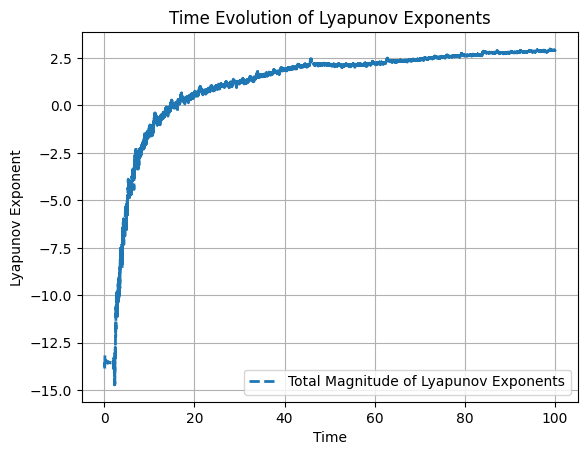

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameters for the Lorenz system
sigma = 10.0
rho = 50.0
beta = 8.0 / 3.0

def lorenz_system(t, Y):
    x, y, z = Y[0], Y[1], Y[2]
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    
    J = np.array([
        [-sigma, sigma, 0], 
        [rho - z, -1, -x], 
        [y, x, -beta]
    ])
    
    dY = Y[3:].reshape((3, 3))
    dY_dt = np.dot(J, dY)
    
    return np.concatenate(([dxdt, dydt, dzdt], dY_dt.flatten()))

# Initial conditions (x, y, z) and initial tangent vectors for variational equations
initial_conditions = [1.0, 1.0, 1.0] + np.eye(3).flatten().tolist()

# Time span for the integration
t_span = [0, 100]
t_eval = np.linspace(*t_span, 10000)

# Solve the Lorenz system and the variational equations
solution = solve_ivp(lorenz_system, t_span, initial_conditions, t_eval=t_eval)

# Extract solution
t = solution.t
traj = solution.y[:3, :]
d_traj = solution.y[3:, :]

# Calculate the Lyapunov exponents using the QR decomposition method, 
# which orthogonalizes the tangent vectors and accumulates the growth rate of the perturbations
lyapunov_exponents = np.zeros((3, len(t)))
for i in range(1, len(t)):
    W = d_traj[:, i].reshape(3, 3)
    Q, R = np.linalg.qr(W)
    d_traj[:, i] = Q.flatten()
    lyapunov_exponents[:, i] = np.log(np.abs(np.diag(R))) / t[i]

# Calculate the total magnitude of the Lyapunov exponents
total_lyapunov_exponent = np.sum(lyapunov_exponents, axis=0)

# Plot the Lyapunov exponents
plt.figure()
plt.plot(t[1:], total_lyapunov_exponent[1:], label='Total Magnitude of Lyapunov Exponents', linewidth=2, linestyle='--')
plt.xlabel('Time')
plt.ylabel('Lyapunov Exponent')
plt.legend()
plt.grid(True)
plt.title('Time Evolution of Lyapunov Exponents')
plt.show()
